# Project for rmrb - Part #[?]

In [1]:
import os

import gensim 
import pyLDAvis.gensim

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the corpus
rmrb_dict = {}
for file in os.listdir("../data/corpus_by_year/"):
    year = int(file[:4])
    text = []
    path = "../data/corpus_by_year/" + file
    with open(path) as f:
        for line in f:
            text += line.split()
    rmrb_dict[year] = text

In [3]:
rmrb = pd.DataFrame.from_dict({"year": rmrb_dict.keys(), "tokens": rmrb_dict.values()}, orient="index").T
rmrb.head()

,year,tokens
0,2002,"[本报, 北京, 2001, 12, 31, 日讯, 知识性, 可读性, 欣赏性, 一体, ..."
1,2001,"[加大, 治本, 力度, 狠抓, 工作, 落实, 取得, 反腐败, 斗争, 成效, 尉健行,..."
2,2000,"[当今, 新年, 钟声, 敲响, 中国, 人民, 全世界, 人民, 怀着, 无比, 兴奋, ..."
3,1971,"[今年, 我国, 人民, 无产阶级, 专政, 继续, 革命, 重要, 一年, 实行, 发展,..."
4,1965,"[坚决, 破除迷信, 改进, 原有, 设计, 洛阳, 轴承厂, 严格, 科学, 精神, 指导..."


### Topic Modelling with Gensim

In [4]:
# Construct the rmrb dictionary
dictionary = gensim.corpora.Dictionary(rmrb["tokens"])

In [5]:
# Create a list of tuples that contains each token and its count
corpus = [dictionary.doc2bow(text) for text in rmrb["tokens"]]

In [6]:
# Serialize the corpus
gensim.corpora.MmCorpus.serialize("../models/LDA/rmrb.mm", corpus)
rmrb_mm = gensim.corpora.MmCorpus("../models/LDA/rmrb.mm")

In [7]:
# Use the formateed corpus for topic modelling and induction
rmrb_lda = gensim.models.ldamodel.LdaModel(corpus=rmrb_mm, id2word=dictionary, num_topics=10, alpha="auto", eta="auto")

In [8]:
rmrb_lda.show_topics()

[(0,
  '0.010*"我们" + 0.008*"社会主义" + 0.008*"建设" + 0.007*"发展" + 0.006*"问题" + 0.006*"工作" + 0.005*"人民" + 0.005*"中国" + 0.005*"革命" + 0.004*"经济"'),
 (1,
  '0.008*"我们" + 0.007*"经济" + 0.007*"发展" + 0.006*"社会主义" + 0.006*"工作" + 0.006*"国家" + 0.006*"问题" + 0.005*"建设" + 0.005*"人民" + 0.004*"中国"'),
 (2,
  '0.009*"发展" + 0.008*"我们" + 0.007*"经济" + 0.007*"社会主义" + 0.006*"工作" + 0.005*"人民" + 0.005*"国家" + 0.004*"中国" + 0.004*"问题" + 0.004*"一个"'),
 (3,
  '0.010*"我们" + 0.010*"发展" + 0.008*"经济" + 0.008*"社会主义" + 0.007*"工作" + 0.006*"建设" + 0.006*"人民" + 0.004*"企业" + 0.004*"革命" + 0.004*"一个"'),
 (4,
  '0.010*"我们" + 0.008*"发展" + 0.007*"工作" + 0.007*"人民" + 0.006*"社会主义" + 0.006*"革命" + 0.006*"问题" + 0.005*"中国" + 0.005*"建设" + 0.004*"生产"'),
 (5,
  '0.013*"发展" + 0.011*"我们" + 0.007*"社会主义" + 0.007*"问题" + 0.006*"工作" + 0.005*"建设" + 0.005*"一个" + 0.005*"中国" + 0.005*"经济" + 0.005*"我国"'),
 (6,
  '0.010*"发展" + 0.010*"我们" + 0.008*"社会主义" + 0.006*"工作" + 0.005*"建设" + 0.005*"国家" + 0.005*"人民" + 0.005*"中国" + 0.004*"问题" + 0.004*"一个"'),
 (7,
  '0.009

In [9]:
# Inspect which topic the model predicts and load into DataFrame
lda_df = pd.DataFrame({
    "year": rmrb["year"], 
    "topics": [rmrb_lda[dictionary.doc2bow(l)] for l in rmrb["tokens"]]
})
lda_df.sort_values(by="year")

,year,topics
4,1965,"[(0, 0.026225835), (2, 0.037304357), (3, 0.267..."
7,1966,"[(0, 0.041381516), (2, 0.044644795), (3, 0.235..."
10,1967,"[(0, 0.010953413), (2, 0.021571314), (3, 0.221..."
35,1968,"[(2, 0.016454685), (3, 0.22745027), (4, 0.6375..."
34,1969,"[(0, 0.035994504), (2, 0.020362124), (3, 0.358..."
5,1970,"[(0, 0.02781341), (2, 0.06737288), (3, 0.50691..."
3,1971,"[(0, 0.046327025), (2, 0.035018478), (3, 0.379..."
8,1972,"[(0, 0.12929234), (2, 0.057249717), (3, 0.2843..."
9,1973,"[(0, 0.14507566), (2, 0.10783299), (3, 0.26184..."
16,1974,"[(0, 0.025804449), (2, 0.5646119), (3, 0.24053..."


In [10]:
# Show the table that makes each topic its own column

# Dictionary that temporarily holds the probability
topicsProbDict = {i: [0] * len(lda_df) for i in range(rmrb_lda.num_topics)}

# Load them into the dictionary
for index, topicTuples in enumerate(lda_df["topics"]):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob
    
# Update the DataFrame
for topicNum in range(rmrb_lda.num_topics):
    lda_df["topic{}".format(topicNum)] = topicsProbDict[topicNum]

lda_df = lda_df.sort_values(by="year")

In [11]:
# Visualize the topics in the corpus
ldaDFV = lda_df[["topic%d" % x for x in range(rmrb_lda.num_topics)]]
ldaDFVisN = lda_df[["year"]]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
4,0.026226,0.000000,0.037304,0.267751,0.481194,0.032545,0.041819,0.022587,0.081153,0.000000
7,0.041382,0.000000,0.044645,0.235285,0.446990,0.034001,0.081068,0.016946,0.096504,0.000000
10,0.010953,0.000000,0.021571,0.221565,0.546111,0.000000,0.106957,0.044601,0.041650,0.000000
35,0.000000,0.000000,0.016455,0.227450,0.637516,0.000000,0.056475,0.018488,0.028594,0.000000
34,0.035995,0.000000,0.020362,0.358605,0.380993,0.012737,0.106858,0.014569,0.067674,0.000000
5,0.027813,0.000000,0.067373,0.506913,0.199659,0.010830,0.075793,0.017873,0.089738,0.000000
3,0.046327,0.000000,0.035018,0.379578,0.295012,0.000000,0.088891,0.010304,0.130566,0.000000
8,0.129292,0.000000,0.057250,0.284319,0.272241,0.015638,0.100897,0.017566,0.113938,0.000000
9,0.145076,0.000000,0.107833,0.261848,0.196320,0.041815,0.154838,0.020002,0.067740,0.000000
16,0.025804,0.000000,0.564612,0.240538,0.030827,0.064818,0.048614,0.000000,0.015446,0.000000


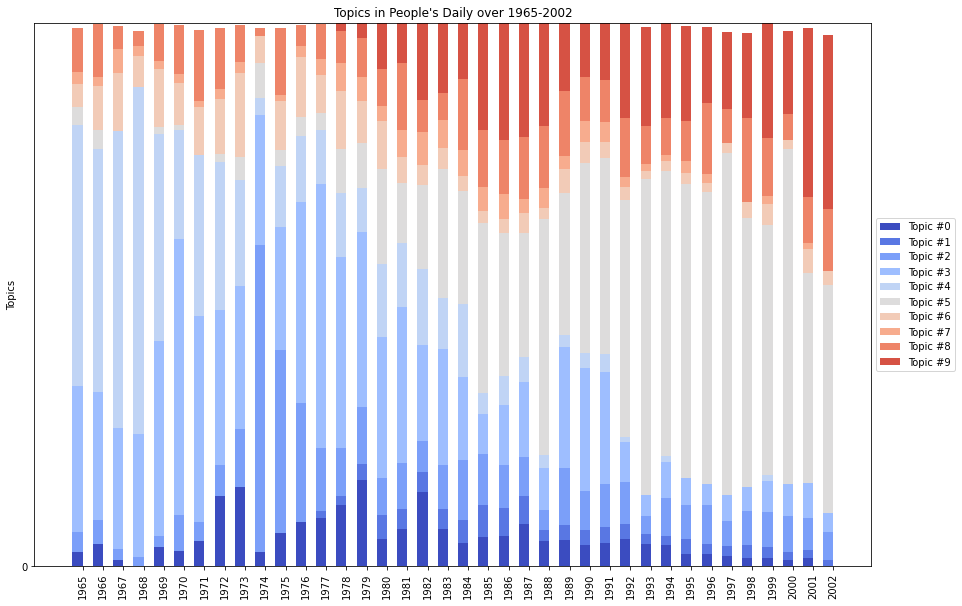

In [12]:
# Visualization as a stacked bar chart
N = 38
ind = np.arange(N)  # The x-axis locations for the novels
K = rmrb_lda.num_topics  # N documents, K topics
width = 0.5  # The width of the bars
plots = []
height_cumulative = np.zeros(N)

plt.figure(figsize=(15, 10))

for k in range(K):
    color = plt.cm.coolwarm(k / K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)

plt.ylim((0, 1)) # Proporations sum to one, so the height of the stacked bars is one
plt.ylabel("Topics")

plt.title("Topics in People's Daily over 1965-2002")
plt.xticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="vertical")
plt.yticks(np.arange(0, 1, 10))
topic_labels = ["Topic #{}".format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc="center left", frameon=True, bbox_to_anchor=(1, 0.5))

path = f"../pictures/lda_barplot.png"
plt.savefig(path, format="png")

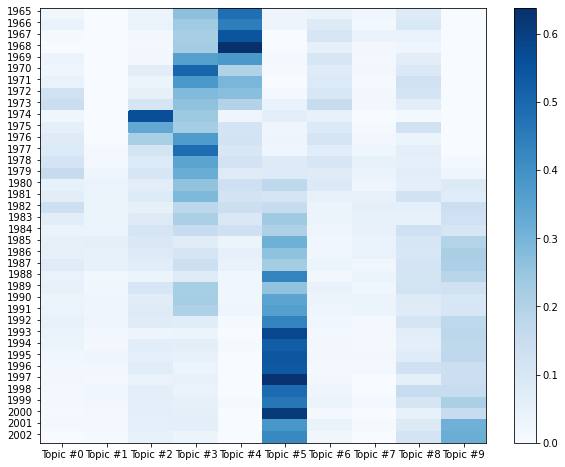

In [13]:
# Visualize as a heatmap
plt.figure(figsize=(10, 8))
plt.pcolor(ldaDFVis, norm=None, cmap="Blues")
plt.yticks(np.arange(ldaDFVis.shape[0]) + 0.5, ldaDFVisNames)
plt.xticks(np.arange(rmrb_lda.num_topics) + 0.5, topic_labels)

# Flip the y-axis so the texts are in the order we anticipate
plt.gca().invert_yaxis()

# Rotate the ticks on the x-axis
plt.xticks()
plt.yticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="horizontal")
plt.colorbar(cmap="Blues")

path = f"../pictures/lda_heatmap.png"
plt.savefig(path, format="png")

### Topic Modelling Dynamic Visualization

In [14]:
rmrb_dictionary = gensim.corpora.Dictionary(rmrb["tokens"])
rmrb_corpus = [dictionary.doc2bow(text) for text in rmrb["tokens"]]
rmrb_lda = gensim.models.ldamodel.LdaModel(corpus=rmrb_mm, id2word=dictionary, num_topics=10, alpha="auto", eta="auto")
vis = pyLDAvis.gensim.prepare(rmrb_lda, rmrb_corpus, rmrb_dictionary)
pyLDAvis.save_html(vis, "../pictures/rmrb_lda.html")